<div class="alert alert-block alert-info">
    
## 1. BASICS ON NLTK (NATURAL LANGUAGE TOOL KIT)

## Checking the few files available in NLTK

In [1]:
## Install NLTK Package
# pip install nltk
import nltk
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from warnings import filterwarnings
filterwarnings("ignore")

<div class="alert alert-block alert-info">
    
## 1. US Presidential Speech

In [2]:
## Importing the inaugural speeches
from nltk.corpus import inaugural
from nltk.corpus import stopwords
nltk.download('inaugural')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\ABC\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ABC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ABC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ABC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ABC\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## 2.1 Find the number of characters, words, and sentences for the mentioned documents.

In [3]:
## Reading the Text of 1941-Roosevelt, 1961-Kennedy,1973-Nixon
Roosevelt = inaugural.raw('1941-Roosevelt.txt')
Kennedy = inaugural.raw('1961-Kennedy.txt')
Nixon = inaugural.raw('1973-Nixon.txt')


In [4]:
Filename= ['1941-Roosevelt.txt','1961-Kennedy.txt','1973-Nixon.txt']
President=['Roosevelt-1941','Kennedy-1961','Nixon-1973']
speech=[Roosevelt,Kennedy,Nixon]

In [5]:
num_words =[]
num_chars=[]
num_sents=[]
for i in Filename:
    num_chars.append(len(inaugural.raw(i)))
    num_words.append(len(inaugural.words(i)))
    num_sents.append(len(inaugural.sents(i)))    

In [6]:
data =pd.DataFrame({'File':Filename,'President':President,'Text':speech, 'charcnt':num_chars,'wordcnt':num_words,'sentcnt':num_sents})

In [7]:
data

,File,President,Text,charcnt,wordcnt,sentcnt
0,1941-Roosevelt.txt,Roosevelt-1941,On each national day of inauguration since 178...,7571,1536,68
1,1961-Kennedy.txt,Kennedy-1961,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618,1546,52
2,1973-Nixon.txt,Nixon-1973,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991,2028,69


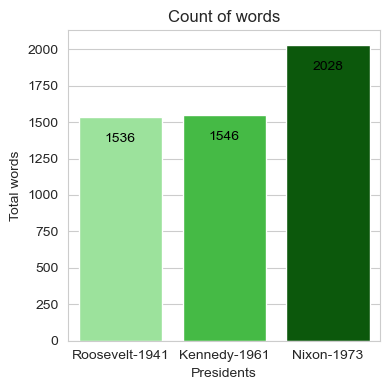

In [8]:
# Visualising the word Importance
sns.set_style("whitegrid")
color = ['lightgreen','limegreen','darkgreen']
plt.figure(figsize=(4,4))
ax = sns.barplot(x = "President", y = 'wordcnt', data = data,palette=color);
ax.bar_label(ax.containers[0], label_type='edge',color='black', rotation =0, fontsize = 10,padding =-20);
plt.title('Count of words')
plt.xlabel('Presidents')
plt.ylabel('Total words')
plt.tight_layout()
plt.show()

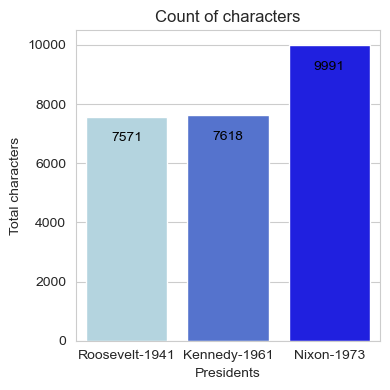

In [9]:
# Visualising the word Importance
sns.set_style("whitegrid")
color = ['lightblue','royalblue','blue']
plt.figure(figsize=(4,4))
ax = sns.barplot(x = "President", y = 'charcnt', data = data,palette=color);
ax.bar_label(ax.containers[0], label_type='edge', color='black',rotation =0, fontsize = 10,padding =-20);
plt.title('Count of characters')
plt.xlabel('Presidents')
plt.ylabel('Total characters')
plt.tight_layout()
plt.show()

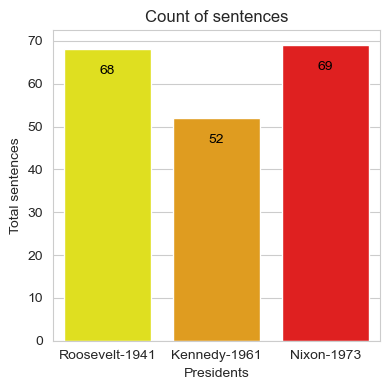

In [10]:
# Visualising the word Importance
color = ['yellow','orange','red']
sns.set_style("whitegrid")
plt.figure(figsize=(4,4))
ax = sns.barplot(x = "President", y = 'sentcnt', data = data,palette=color);
ax.bar_label(ax.containers[0], label_type='edge',color='black', rotation =0, fontsize = 10,padding =-20);
plt.title('Count of sentences')
plt.xlabel('Presidents')
plt.ylabel('Total sentences')
plt.tight_layout()
plt.show()

## 2.2.	Remove all the stopwords from all three speeches.

In [11]:
data

,File,President,Text,charcnt,wordcnt,sentcnt
0,1941-Roosevelt.txt,Roosevelt-1941,On each national day of inauguration since 178...,7571,1536,68
1,1961-Kennedy.txt,Kennedy-1961,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618,1546,52
2,1973-Nixon.txt,Nixon-1973,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991,2028,69


In [12]:
cleantext=[]
for i in data.iloc[:,0]:
    raw = inaugural.raw(i).lower()
    ## Cleaning the special characters (/@$: etc)
    ## from Regular Expressions package
    ## re.sub() function for string substitution using regular expressions
    raw = re.sub("[^a-zA-Z]"," ",str(raw))
    cleantext.append(raw)

In [13]:
data['cleantext']=cleantext

In [14]:
i=0
while i<3:
    print('The contents of President {} speech after cleaning is as below'.format(data['President'][i]))
    print(' ')
    print(data['cleantext'][i])
    print(' ')
    print(' ')
    i=i+1    

The contents of President Roosevelt-1941 speech after cleaning is as below
 
on each national day of inauguration since       the people have renewed their sense of dedication to the united states   in washington s day the task of the people was to create and weld together a nation   in lincoln s day the task of the people was to preserve that nation from disruption from within   in this day the task of the people is to save that nation and its institutions from disruption from without   to us there has come a time  in the midst of swift happenings  to pause for a moment and take stock    to recall what our place in history has been  and to rediscover what we are and what we may be  if we do not  we risk the real peril of inaction   lives of nations are determined not by the count of years  but by the lifetime of the human spirit  the life of a man is three score years and ten  a little more  a little less  the life of a nation is the fullness of the measure of its will to live   there

In [15]:
num_words =[]
j=0
for k in data.iloc[:,1]:
    raw=data['cleantext'][j]
    tokens = nltk.word_tokenize(raw)
    en_stop = stopwords.words('english')
    stopped_tokens = [i for i in tokens if not i in en_stop]
    j=j+1
    num_words.append(len(stopped_tokens))
    
data['revisedwordcnt']=num_words

In [16]:
data[['President','File','wordcnt','revisedwordcnt']]

,President,File,wordcnt,revisedwordcnt
0,Roosevelt-1941,1941-Roosevelt.txt,1536,625
1,Kennedy-1961,1961-Kennedy.txt,1546,688
2,Nixon-1973,1973-Nixon.txt,2028,833


## 2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords) 

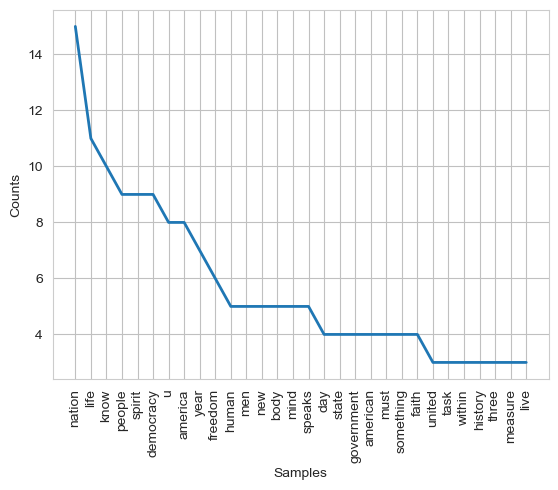

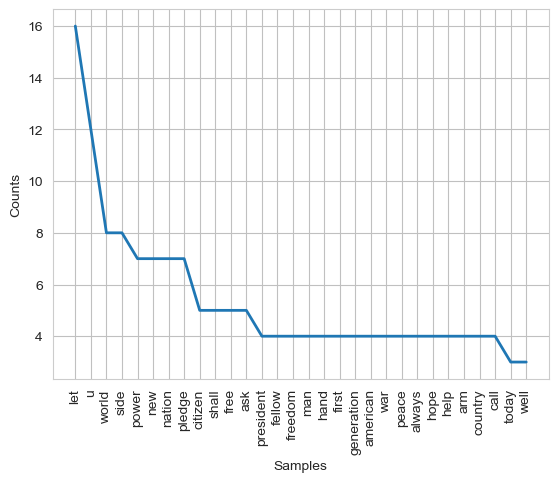

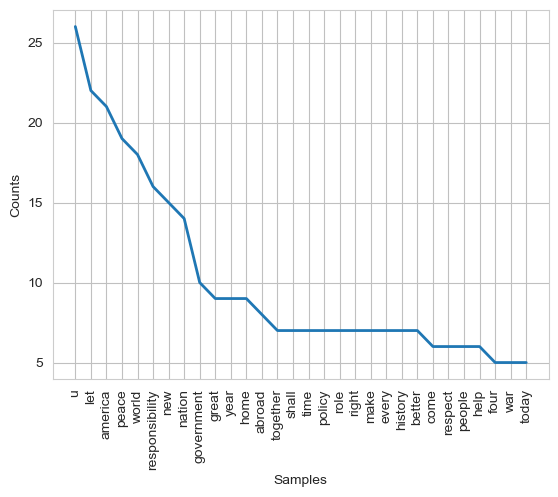

In [17]:
txtarr=[]
from nltk import WordNetLemmatizer
j=0
for k in data.iloc[:,1]:
    raw=data['cleantext'][j]
    tokens = nltk.word_tokenize(raw)
    en_stop = stopwords.words('english')
    stopped_tokens = [i for i in tokens if not i in en_stop]
    lt = nltk.WordNetLemmatizer()
    texts=[lt.lemmatize(i) for i in stopped_tokens]
    top3 = pd.DataFrame(nltk.FreqDist(texts).most_common(3),columns=[['Text','Count']])
    top3.iloc[1:1]
    nltk.FreqDist(texts).plot(30);
    j=j+1
    txtarr.append(texts)    

In [18]:
raw=data['cleantext'][0]
tokens = nltk.word_tokenize(raw)
en_stop = stopwords.words('english')
stopped_tokens = [i for i in tokens if not i in en_stop]
texts=[lt.lemmatize(i) for i in stopped_tokens]
top3= nltk.FreqDist(texts).most_common(3)
dataroose=pd.DataFrame(np.asarray(top3),columns=['word','count'])
dataroose['count']=dataroose['count'].astype(int)
dataroose=dataroose.sort_values(by='count',ascending =False)

In [19]:
dataroose

,word,count
0,nation,15
1,life,11
2,know,10


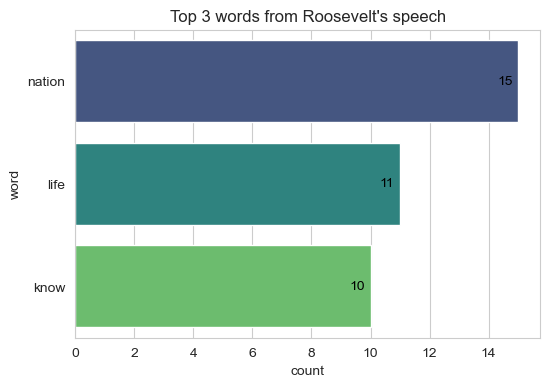

In [20]:
# Visualising the Feature Importance
sns.set_style("whitegrid")
plt.figure(figsize=(6,4))
ax = sns.barplot(x=dataroose['count'],y=dataroose['word'],palette='viridis');
ax.bar_label(ax.containers[0], label_type='edge', color = 'black',rotation =0, fontsize = 10,padding =-15);
plt.title("Top 3 words from Roosevelt's speech");

In [21]:
raw=data['cleantext'][1]
tokens = nltk.word_tokenize(raw)
en_stop = stopwords.words('english')
stopped_tokens = [i for i in tokens if not i in en_stop]
texts=[lt.lemmatize(i) for i in stopped_tokens]
top_3= nltk.FreqDist(texts).most_common(3)
dataken=pd.DataFrame(np.asarray(top_3),columns=['word','count']) 
dataken['count']=dataken['count'].astype(int)
dataken=dataken.sort_values(by='count',ascending = False)

In [22]:
dataken

,word,count
0,let,16
1,u,12
2,world,8


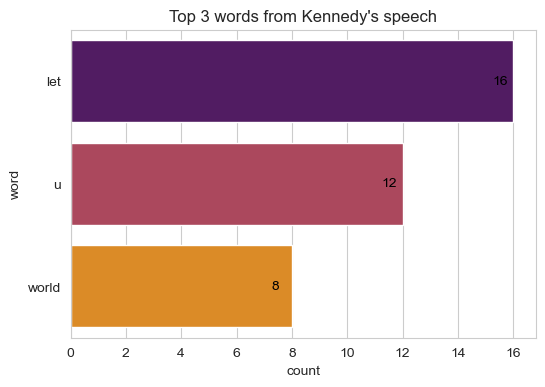

In [23]:
# Visualising the Feature Importance
sns.set_style("whitegrid")
plt.figure(figsize=(6,4))
ax = sns.barplot(x=dataken['count'],y=dataken['word'],palette='inferno');
ax.bar_label(ax.containers[0], label_type='edge', color = 'black',rotation =0, fontsize = 10,padding =-15);
plt.title("Top 3 words from Kennedy's speech");

In [24]:
raw=data['cleantext'][2]
tokens = nltk.word_tokenize(raw)
en_stop = stopwords.words('english')
stopped_tokens = [i for i in tokens if not i in en_stop]
texts=[lt.lemmatize(i) for i in stopped_tokens]
top3= nltk.FreqDist(texts).most_common(3)
datanix=pd.DataFrame(np.asarray(top3),columns=['word','count']) 
datanix['count']=datanix['count'].astype(int)
datanix=datanix.sort_values(by='count',ascending = False)

In [25]:
datanix

,word,count
0,u,26
1,let,22
2,america,21


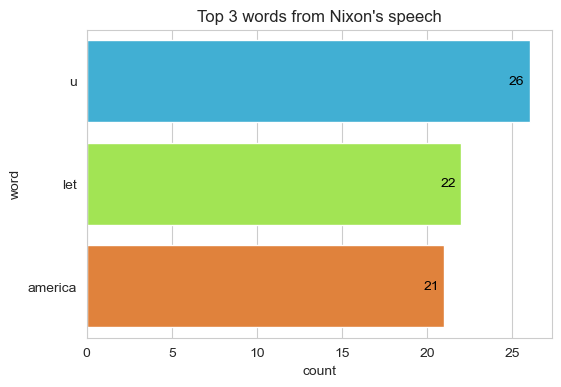

In [26]:
# Visualising the Feature Importance
sns.set_style("whitegrid")
plt.figure(figsize=(6,4))
ax = sns.barplot(x=datanix['count'],y=datanix['word'],palette='turbo');
ax.bar_label(ax.containers[0], label_type='edge', color = 'black',rotation =0, fontsize = 10,padding =-15);
plt.title("Top 3 words from Nixon's speech");

## 2.4.	Plot the word cloud of each of the speeches of the variable. (after removing the stopwords) 

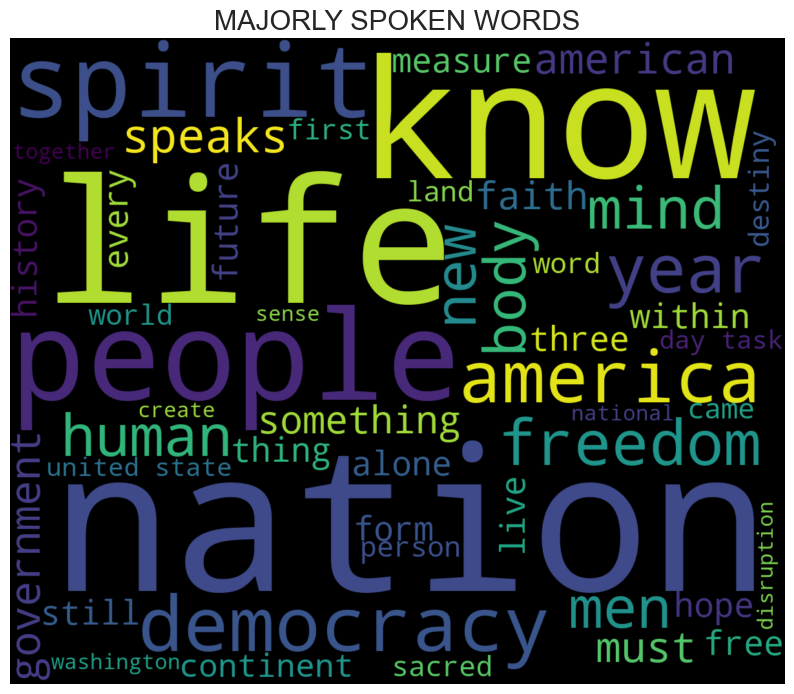

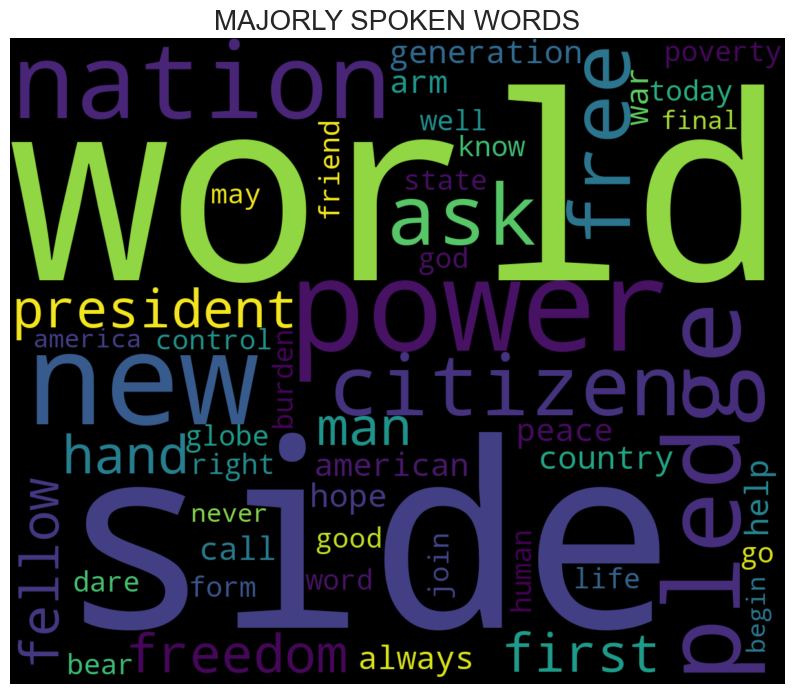

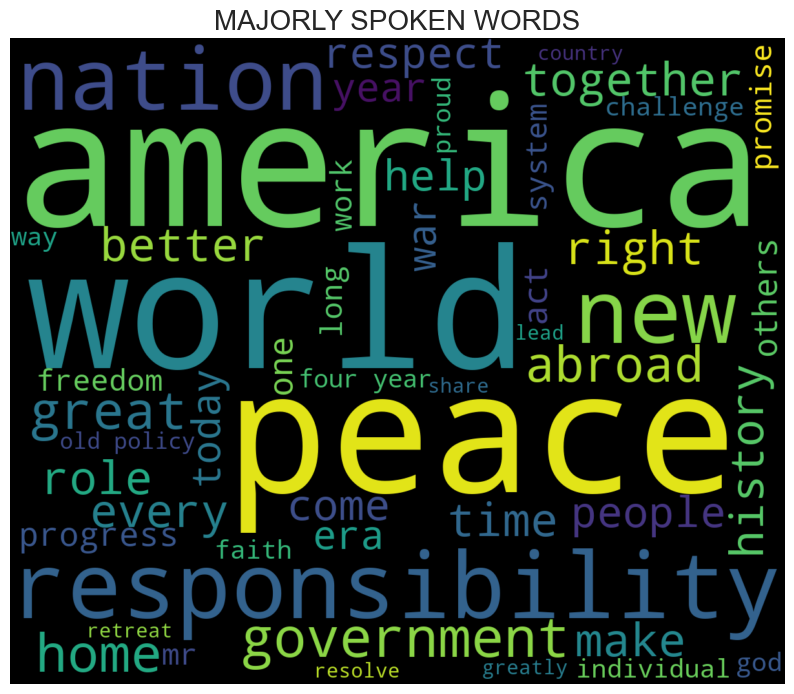

In [27]:
## Creating WordCloud
i=0
from wordcloud import WordCloud, STOPWORDS

new_words = set(STOPWORDS)
new_words.update(['u','seek', 'let','us'])

while i < 3:
    plt.subplots(figsize=(10,10))
    wordcloud = WordCloud(background_color='black',max_words=50,
                            width=1200,stopwords=new_words ,
                            height=1000).generate(" ".join(txtarr[i]))

    plt.title("MAJORLY SPOKEN WORDS",fontsize=20)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    
    i=i+1    

# End